# The effects of the Covid 19 in Argentina using Apache Spark.

In all this examples we will be downloading official data from "datos.gob.ar" using Pandas library and loading the dataframes with PySpark.

## Covid 19 confirmed cases in each provinces. 

We downloaded the data from "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv".
We extracted it taking into account only confirmed cases and divided between those who recovered and those who passed away.

*Beware: the Covid19Casos.csv file is 1,2gb it may take a while to download it.*

In [2]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np
import string

In [ ]:
pdDF = pd.read_csv('https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv')

In [3]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.createDataFrame(pdDF)

provinces = df.select('residencia_provincia_nombre','fallecido').where(col('clasificacion_resumen').like('Confirmado'))

In [6]:
provinces_list = list()

for province in provinces.select('residencia_provincia_nombre').collect():
    if province[0] not in provinces_list:
        provinces_list.append(province[0])

provinces_list.sort()
provinces_list.pop(16)

infected_amount = list()

for province in provinces_list:
    x = provinces.select('residencia_provincia_nombre').where(col('residencia_provincia_nombre').like(f'{province}')).count()
    infected_amount.append(x)

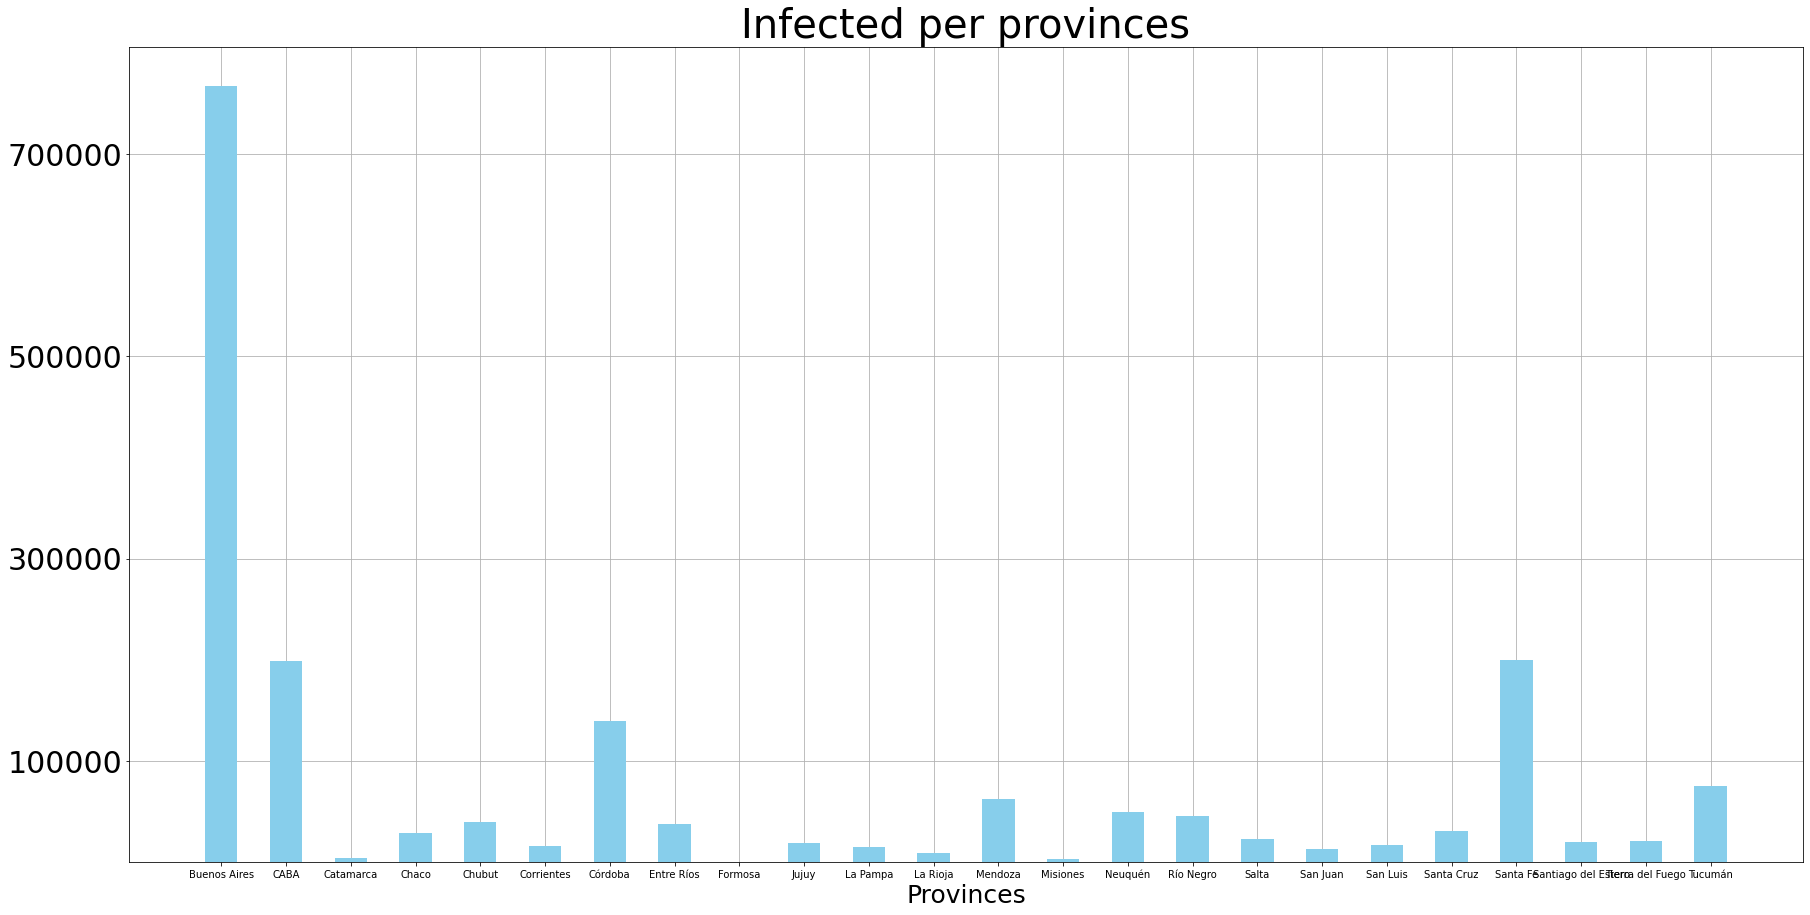

In [20]:
y = np.arange(100000, 900000, 200000)

plt.bar(provinces_list, infected_amount, width=0.5, align='center', color='skyblue', zorder=3)
plt.gcf().set_size_inches(30, 15)
plt.title('Infected per provinces', fontdict= {'fontsize':40})
plt.xticks(provinces_list, fontsize = 10)
plt.yticks(y, fontsize =30)
plt.xlabel('Provinces', fontdict = {'fontsize':25})
plt.grid(zorder=0)
plt.show()

In [22]:
deceased = provinces.select('residencia_provincia_nombre').where(col('fallecido').startswith('SI'))

deceased_list = list()

for province in provinces_list:
    x = deceased.select('residencia_provincia_nombre').where(col('residencia_provincia_nombre').like(f'{province}')).count()
    deceased_list.append(x)

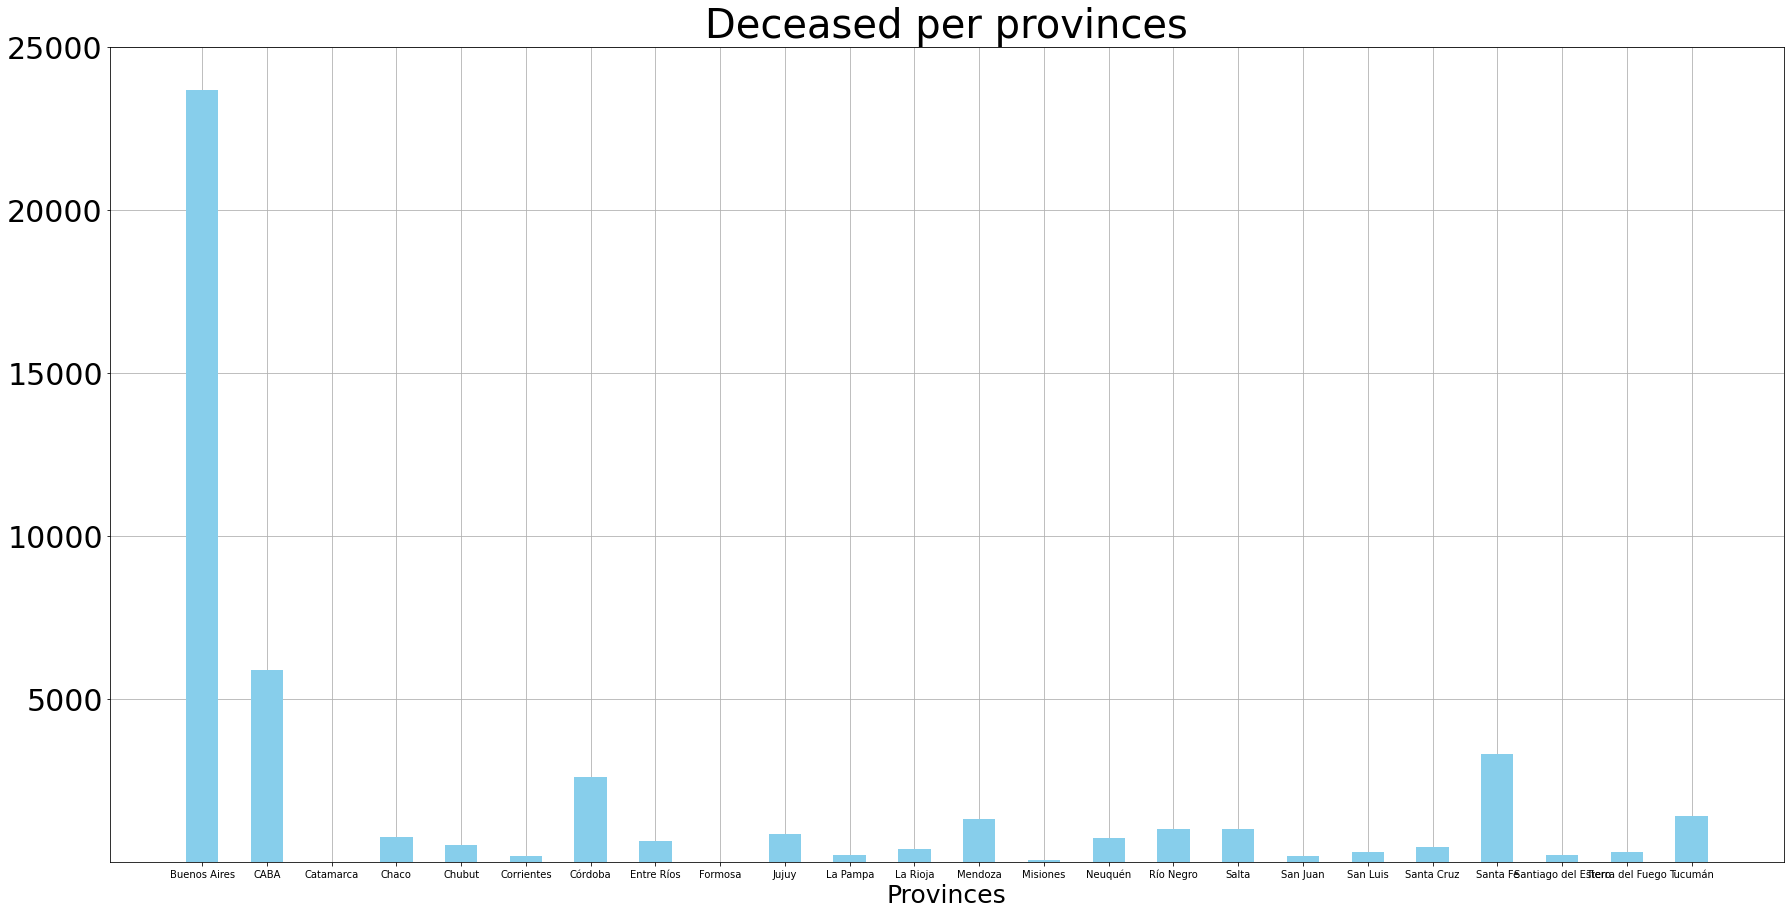

In [25]:
y = np.arange(5000, 30000, 5000)

plt.bar(provinces_list, deceased_list, width=0.5, align='center', color='skyblue', zorder=3)
plt.gcf().set_size_inches(30, 15)
plt.title('Deceased per provinces', fontdict= {'fontsize':40})
plt.xticks(provinces_list, fontsize = 10)
plt.yticks(y, fontsize =30)
plt.xlabel('Provinces', fontdict = {'fontsize':25})
plt.grid(zorder=0)
plt.show()

## The difference between 2019 and 2020 shipments of oilseeds, cereals and subproducts.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/369/distribution/369.3/download/embarques-de-oleaginosas-y-cereales-mensual.csv". We extract the data to compare the total amount of shipments between 2019 and 2020, and the difference per product.

In [26]:
pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/369/distribution/369.3/download/embarques-de-oleaginosas-y-cereales-mensual.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

shipments = spark.createDataFrame(pdDF)

No handles with labels found to put in legend.


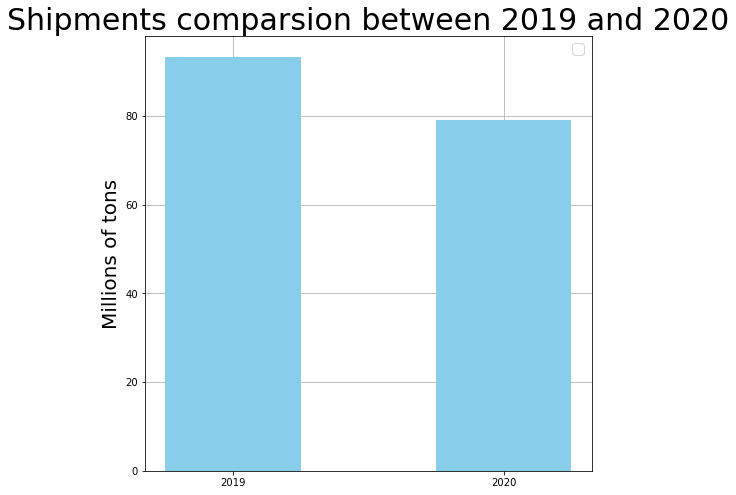

In [34]:
shipments2019 = shipments.select('total').where(col('indice_tiempo').startswith('2019'))
shipments2020 = shipments.select('total').where(col('indice_tiempo').startswith('2020'))

total2019 = shipments2019.groupBy().sum('total').collect()
total2020 = shipments2020.groupBy().sum('total').collect()

labels = ['2019', '2020']

values = list()
for shipment in total2019:
    values.append(shipment[0])
    
for shipment in total2020:
    values.append(shipment[0])
    
plt.bar(labels, values, width=0.5, color='skyblue', zorder=3)
plt.gcf().set_size_inches(8, 8)
plt.title('Shipments comparsion between 2019 and 2020', fontdict= {'fontsize':30})
plt.ylabel('Millions of tons',fontdict= {'fontsize':20})
plt.legend(fontsize=15)
plt.grid()
plt.show()

In [38]:
def comparison_per_month(tons2019, tons2020, product):

    x = ['January','February','March','April','May', 'June','July','August', 'September','October','November','December']
    y = np.arange(0, 5, 0.5)

    plt.plot(x, tons2019, 'b.-', label= ('2019'))
    plt.plot(x, tons2020, 'r.--', label= ('2020'))
    plt.title(f'Shipments of {product}', fontdict = {'fontsize':40})
    plt.ylabel('Millions of tons', fontdict = {'fontsize':20})
    plt.gcf().set_size_inches(15, 7)
    plt.xticks(x)
    plt.yticks(y)
    plt.legend(fontsize=15)
    plt.grid()
    plt.show()

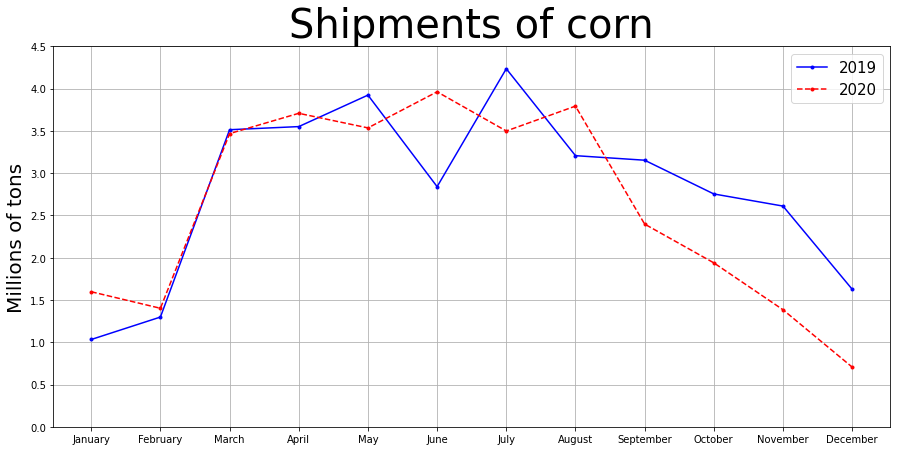

In [39]:
#Corn
corn2019 = shipments.select('maiz').where(col('indice_tiempo').startswith('2019'))
corn_tons_2019 = list()
for line in corn2019.collect():
    line = float(line[0])
    corn_tons_2019.append(line)

corn2020 = shipments.select('maiz').where(col('indice_tiempo').startswith('2020'))
corn_tons_2020 = list()
for line in corn2020.collect():
    line = float(line[0])
    corn_tons_2020.append(line)

corn = (corn_tons_2019,corn_tons_2020,'corn')

comparison_per_month(*corn)

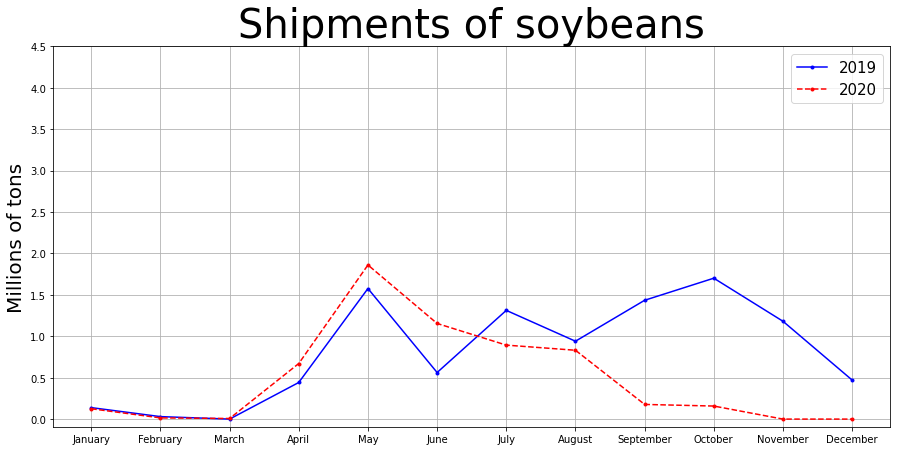

In [40]:
#Soybeans
soybeans2019 = shipments.select('poroto_soja').where(col('indice_tiempo').startswith('2019'))
soybeans_tons_2019 = list()
for line in soybeans2019.collect():
    line = float(line[0])
    soybeans_tons_2019.append(line)

soybeans2020 = shipments.select('poroto_soja').where(col('indice_tiempo').startswith('2020'))
soybeans_tons_2020 = list()
for line in soybeans2020.collect():
    line = float(line[0])
    soybeans_tons_2020.append(line)

soybeans = (soybeans_tons_2019,soybeans_tons_2020,'soybeans')

comparison_per_month(*soybeans)

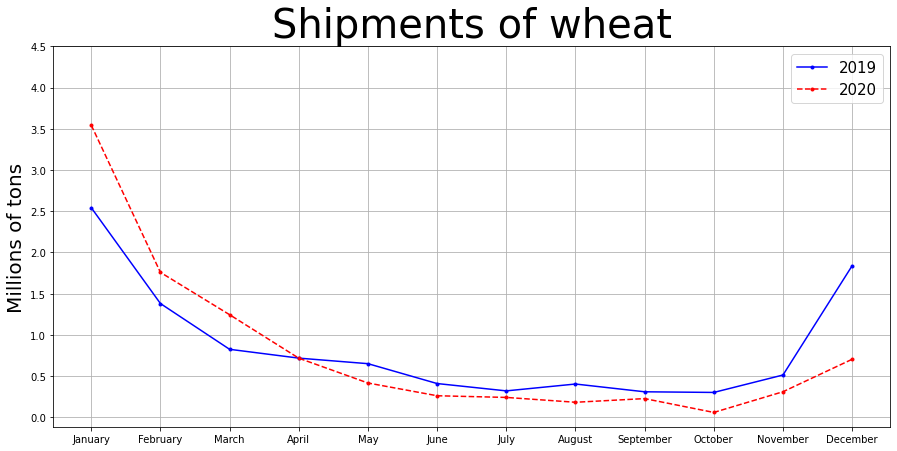

In [41]:
#Wheat
wheat2019 = shipments.select('trigo').where(col('indice_tiempo').startswith('2019'))
wheat_tons_2019 = list()
for line in wheat2019.collect():
    line = float(line[0])
    wheat_tons_2019.append(line)

wheat2020 = shipments.select('trigo').where(col('indice_tiempo').startswith('2020'))
wheat_tons_2020 = list()
for line in wheat2020.collect():
    line = float(line[0])
    wheat_tons_2020.append(line)
    
wheat = (wheat_tons_2019, wheat_tons_2020, 'wheat')

comparison_per_month(*wheat)

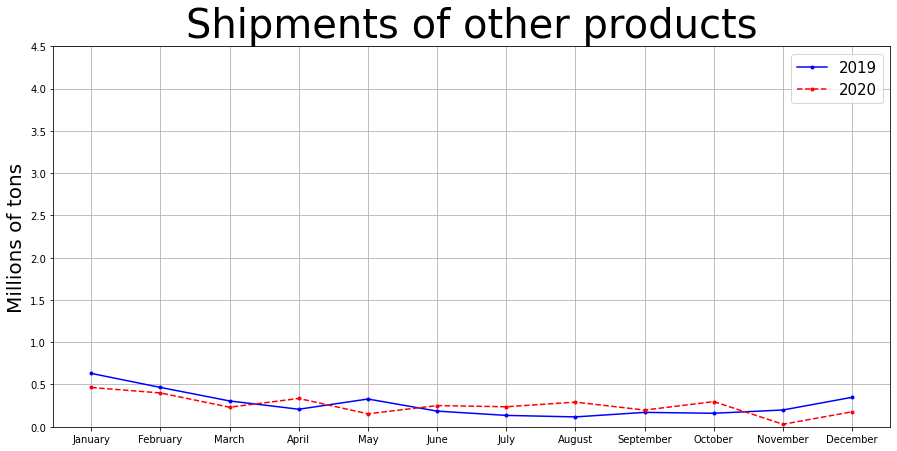

In [45]:
#Other products
other2019 = shipments.select('resto').where(col('indice_tiempo').startswith('2019'))
other_tons_2019 = list()
for line in other2019.collect():
    line = float(line[0])
    other_tons_2019.append(line)

other2020 = shipments.select('resto').where(col('indice_tiempo').startswith('2020'))
other_tons_2020 = list()
for line in other2020.collect():
    line = float(line[0])
    other_tons_2020.append(line)

other = (other_tons_2019, other_tons_2020,'other products')

comparison_per_month(*other)

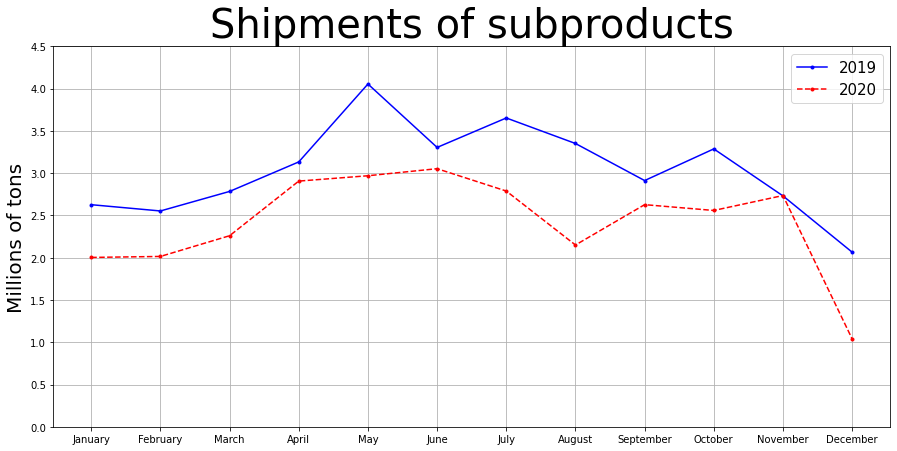

In [46]:
#Subproducts
subproducts2019 = shipments.select('subproductos').where(col('indice_tiempo').startswith('2019'))
subproducts_tons_2019 = list()
for line in subproducts2019.collect():
    line = float(line[0])
    subproducts_tons_2019.append(line)

subproducts2020 = shipments.select('subproductos').where(col('indice_tiempo').startswith('2020'))
subproducts_tons_2020 = list()
for line in subproducts2020.collect():
    line = float(line[0])
    subproducts_tons_2020.append(line)

subproducts = (subproducts_tons_2019, subproducts_tons_2020,'subproducts')

comparison_per_month(*subproducts)

## Comparing employment rates between 2019 and 2020.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/154/distribution/154.1/download/asalariados-registrados-sector-privado-segun-provincia-datos-con-estacionalidad.csv". Adding a column name "total" where we sum the employees of every province by month of the year we compared the amount between 2019 and 2020 by month.

In [48]:
pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/154/distribution/154.1/download/asalariados-registrados-sector-privado-segun-provincia-datos-con-estacionalidad.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.createDataFrame(pdDF)

df = df.withColumn('total',(df[df.columns[1]] + df[df.columns[2]] + df[df.columns[3]] + df[df.columns[4]] + 
                            df[df.columns[5]] + df[df.columns[6]] + df[df.columns[7]] + df[df.columns[8]] + 
                            df[df.columns[9]] + df[df.columns[10]] + df[df.columns[11]] + df[df.columns[12]] + 
                            df[df.columns[13]] + df[df.columns[14]] + df[df.columns[15]] + df[df.columns[16]] + 
                            df[df.columns[17]] + df[df.columns[18]] + df[df.columns[19]] + df[df.columns[20]] + 
                            df[df.columns[21]] + df[df.columns[22]] + df[df.columns[23]] + df[df.columns[24]]))

In [49]:
employees2019 = df.select('total').where(col('indice_tiempo').startswith('2019'))

amount_employees_2019 = list()
for line in employees2019.collect():
    line = float(line[0])
    amount_employees_2019.append(line)

employees2020 = df.select('total').where(col('indice_tiempo').startswith('2020'))

amount_employees_2020 = list()
for line in employees2020.collect():
    line = float(line[0])
    amount_employees_2020.append(line)

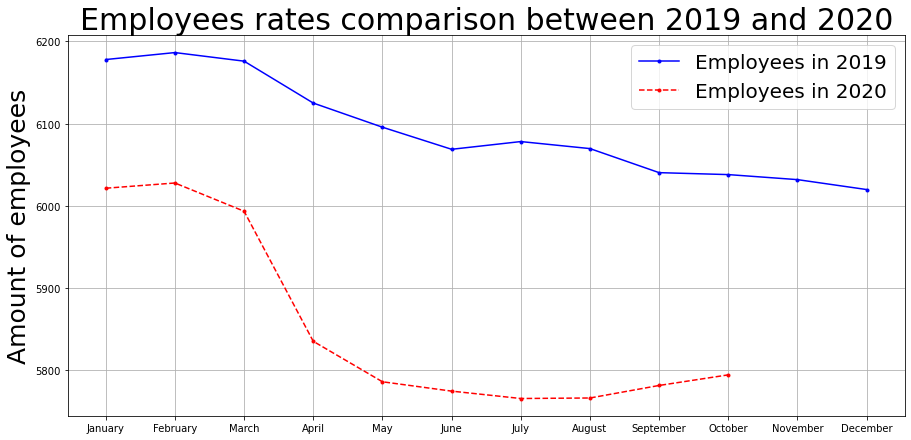

In [51]:
x = ['January','February','March','April','May', 'June','July','August', 'September','October','November','December']
x2 = ['January','February','March','April','May', 'June','July','August', 'September','October']

plt.plot(x, amount_employees_2019, 'b.-', label='Employees in 2019')
plt.plot(x2, amount_employees_2020, 'r.--', label='Employees in 2020')
plt.title('Employees rates comparison between 2019 and 2020', fontdict= {'fontsize':30})
plt.gcf().set_size_inches(15, 7)
plt.ylabel('Amount of employees', fontdict = {'fontsize':25})
plt.xticks(x)
plt.legend(fontsize=20)
plt.grid()
plt.show()